### Sales Prediction 
(Simple Linear Regression) 

**Name:** Manuel Ibañez Salazar

#### Import Libraries

In [ ]:

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:

np.random.seed(42)
years_exp = np.random.uniform(1, 10, 30)
salary = 25000 + (years_exp * 9000) + np.random.normal(0, 5000, 30)

df = pd.DataFrame({
    'YearsExperience': years_exp,
    'Salary': salary
})


df.to_csv('Salary_Data.csv', index=False)

print(df.head())

   YearsExperience         Salary
0         4.370861   58582.781740
1         9.556429  112886.348911
2         7.587945   90288.315837
3         6.387926   81032.868471
4         2.404168   43628.976815


#### Import the Dataset

#### Data Inspection

In [ ]:

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None

Estadísticas descriptivas:
       YearsExperience         Salary
count        30.000000      30.000000
mean          4.947375   68616.232245
std           2.541668   21319.289386
min           1.185260   36711.662013
25%           2.687246   52242.869419
50%           4.629183   60488.372269
75%           6.482516   86414.695522
max           9.729189  112886.348911

Valores nulos por columna:
YearsExperience    0
Salary             0
dtype: int64


#### Exploratory Data Analysis


##### Outlier Analysis

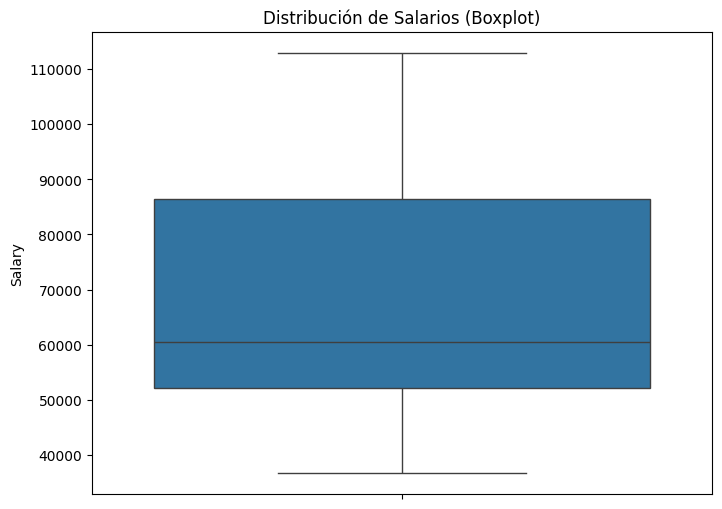

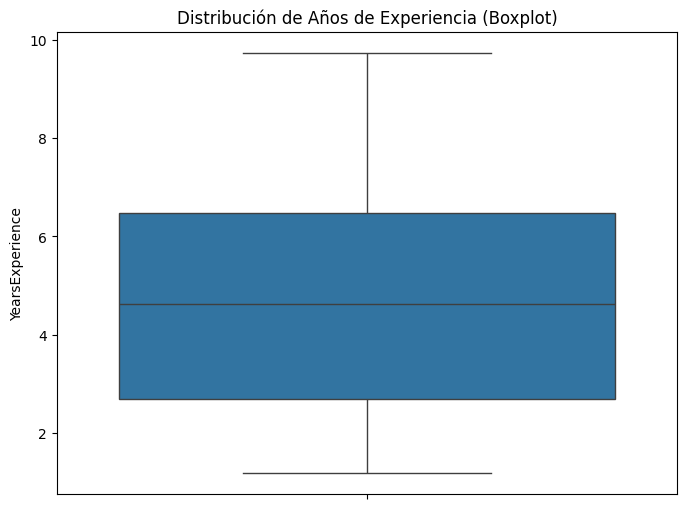

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Salary'])
plt.title('Distribución de Salarios (Boxplot)')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(y=df['YearsExperience'])
plt.title('Distribución de Años de Experiencia (Boxplot)')
plt.show()

##### Correlation Analysis


Matriz de correlación:
                 YearsExperience    Salary
YearsExperience         1.000000  0.980705
Salary                  0.980705  1.000000


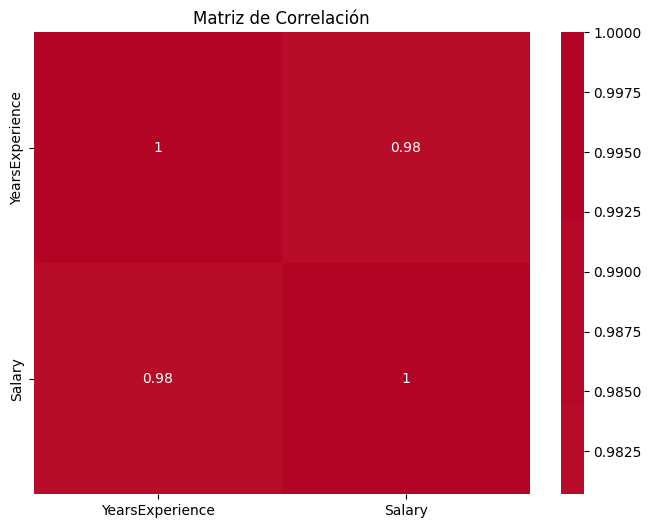

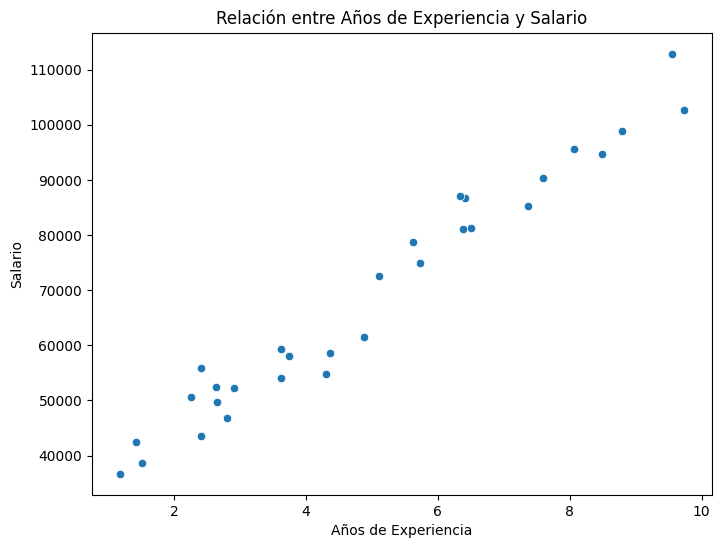

In [ ]:

corr_matrix = df.corr()
print("\nMatriz de correlación:")
print(corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Relación entre Años de Experiencia y Salario')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

#### Building the model

In [ ]:

X = df[['YearsExperience']]  


y = df['Salary']

##### Separating predictor and target

In [ ]:

X = df[['YearsExperience']]  

y = df['Salary']

##### Train-Test split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

print("\nForma de los conjuntos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


print("\nPrimeras filas de X_train:")
print(X_train.head())

print("\nPrimeras filas de y_train:")
print(y_train.head())


Forma de los conjuntos:
X_train: (21, 1)
X_test: (9, 1)
y_train: (21,)
y_test: (9,)

Primeras filas de X_train:
    YearsExperience
0          4.370861
4          2.404168
16         3.738180
5          2.403951
13         2.911052

Primeras filas de y_train:
0     58582.781740
4     43628.976815
16    58065.380268
5     55896.947070
13    52183.774144
Name: Salary, dtype: float64


,Salary
8,64446.0
26,116970.0
4,39892.0
3,43526.0
17,83089.0


,YearsExperience
8,3.3
26,9.6
4,2.3
3,2.1
17,5.4


##### Train the model

In [ ]:

model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

print("\nParámetros del modelo:")
print("Intercepto (β₀):", model.intercept_)
print("Coeficiente (β₁):", model.coef_)


Parámetros del modelo:
Intercepto (β₀): 27979.000699174067
Coeficiente (β₁): [8153.61769875]


##### Evaluate the model with training data


Evaluación en datos de entrenamiento:
Error Cuadrático Medio (MSE): 14032966.697783686
Coeficiente de Determinación (R²): 0.972264259298704


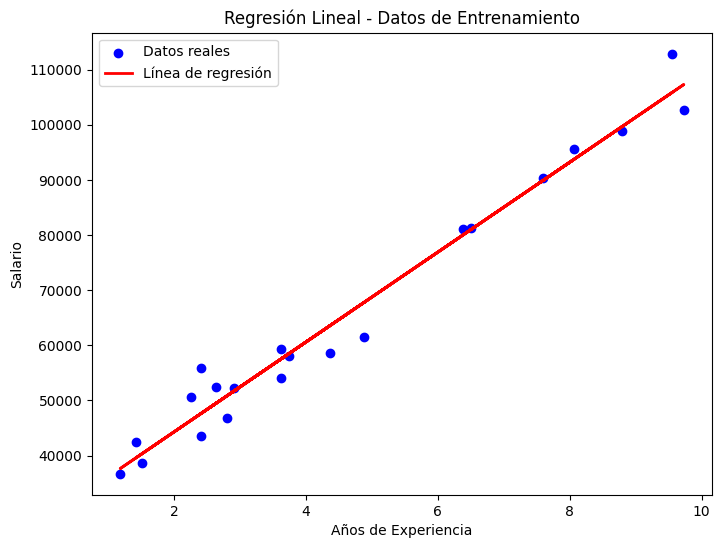

In [ ]:

y_train_pred = model.predict(X_train)


mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nEvaluación en datos de entrenamiento:")
print("Error Cuadrático Medio (MSE):", mse_train)
print("Coeficiente de Determinación (R²):", r2_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos reales')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal - Datos de Entrenamiento')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

Intercept (β₀): [25966.81240956]
Slope (β₁): [9530.13220707]
MSE: 31383916.868368346
R²: 0.9594673092471049


##### Evaluate the model with Test data


Evaluación en datos de prueba:
Error Cuadrático Medio (MSE): 23634115.724369314
Coeficiente de Determinación (R²): 0.8842310082385462


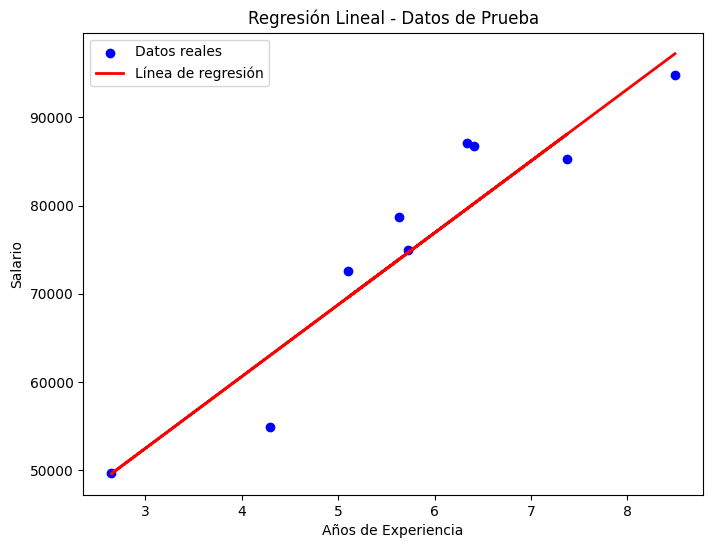

In [ ]:

y_test_pred = model.predict(X_test)


mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluación en datos de prueba:")
print("Error Cuadrático Medio (MSE):", mse_test)
print("Coeficiente de Determinación (R²):", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal - Datos de Prueba')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

### final evaluation

In [ ]:
 
print("\nEcuación del modelo:")
print(f"Salario = {model.intercept_:.2f} + {model.coef_[0]:.2f} * AñosExperiencia")


Ecuación del modelo:
Salario = 27979.00 + 8153.62 * AñosExperiencia


### Prediction with new data

In [ ]:

nuevo_dato = pd.DataFrame({'YearsExperience': [5]})
salario_predicho = model.predict(nuevo_dato)

print(f"\nPara 5 años de experiencia, el salario predicho es: ${salario_predicho[0]:.2f}")


Para 5 años de experiencia, el salario predicho es: $68747.09
